In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import time

## 페이지 크롤링

In [2]:
ser = Service('chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [3]:
url = 'http://search.danawa.com/dsearch.php?k1=무선청소기'
driver.get(url)

In [4]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [5]:
#prod_items = soup.select('ul.product_list div.prod_main_info')
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
print(len(prod_items))
prod_items

44


[<li class="prod_item " id="productItem13327520">
 <input id="productItem_categoryInfo_13327520" type="hidden" value="생활가전_청소기"/>
 <input id="min_price_13327520" type="hidden" value="1057790"/>
 <div class="prod_main_info">
 <div class="thumb_image">
 <a class="thumb_link click_log_product_standard_img_" href="http://prod.danawa.com/info/?pcode=13327520&amp;keyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&amp;cate=102207" id="thumbLink_13327520" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
 <img alt="코드제로 ThinQ A9S AO9571" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/520/327/img/13327520_1.jpg?shrink=130:130&amp;_v=20210406161021"/>
 </a>
 <a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_13327520" onclick="return false;">
 <span class="ico i_zoom_vw"></span>이미지보기
 						</a>
 <input id="hidden_cate_sub_c1" type="hidden" value="72"/>
 <input id="hidden_ca

In [6]:
prod_items[0]

<li class="prod_item " id="productItem13327520">
<input id="productItem_categoryInfo_13327520" type="hidden" value="생활가전_청소기"/>
<input id="min_price_13327520" type="hidden" value="1057790"/>
<div class="prod_main_info">
<div class="thumb_image">
<a class="thumb_link click_log_product_standard_img_" href="http://prod.danawa.com/info/?pcode=13327520&amp;keyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&amp;cate=102207" id="thumbLink_13327520" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
<img alt="코드제로 ThinQ A9S AO9571" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/520/327/img/13327520_1.jpg?shrink=130:130&amp;_v=20210406161021"/>
</a>
<a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_13327520" onclick="return false;">
<span class="ico i_zoom_vw"></span>이미지보기
						</a>
<input id="hidden_cate_sub_c1" type="hidden" value="72"/>
<input id="hidden_cate_sub_c2" ty

In [7]:
prod_items[0].select('p.prod_name > a')[0].text

'LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571'

In [8]:
prod_items[0].select('div.spec_list')[0].text.strip()

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm'

In [9]:
prod_items[0].select('p.price_sect > a > strong')[0].text.strip().replace(',','')

'1057790'

In [10]:
prod_data = []

for prod_item in prod_items:
    #if 'product-pot' in prod_item['class']:
        #continue # 공백부분('li.prod_item.product-pot') 제외하기
    try:
        title = prod_item.select('p.prod_name > a')[0].text.strip()
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
        price = prod_item.select('p.price_sect > a > strong')[0].text.strip().replace(',','')
        prod_data.append([title, spec_list, price])
    except:
        pass # 진행 시 에러가 발생할 경우(광고 상품 등) 넘어가기
    
print(len(prod_data))
prod_data[:5]

41


[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  '1057790'],
 ['BEV3OYdhEu', 'BEV3OYdhEu547876', '547876'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '566140'],
 ['LG전자 코드제로 ThinQ A9S AS9370IKT',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기

In [11]:
# 상품 정보 태그에서 원하는 정보를 추출하는 함수
def get_prod_items(prod_itmes):
    prod_data = []

    for prod_item in prod_items:
        #if 'product-pot' in prod_item['class']:
            #continue # 공백부분('li.prod_item.product-pot') 제외하기
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
            price = prod_item.select('p.price_sect > a > strong')[0].text.strip().replace(',','')
            prod_data.append([title, spec_list, price])
            
        except:
            pass # 진행 시 에러가 발생할 경우(광고 상품 등) 넘어가기
    return prod_data

In [12]:
# 상품 정보를 가져오는 함수 테스트
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))
prod_data

41


[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  '1057790'],
 ['BEV3OYdhEu', 'BEV3OYdhEu547876', '547876'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '566140'],
 ['LG전자 코드제로 ThinQ A9S AS9370IKT',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기

### 여러 페이지 크롤링

In [ ]:
# 1페이지
http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain

http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&\
    originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&previousKeyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&\
    volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&\
    defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods    
    
# 2페이지
http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&\
    originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list\
    &boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0\
    &defaultVmTab=2606&defaultVaTab=390097&tab=goods
    
# 3페이지
http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&\
    originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=3&limit=40&sort=saveDESC&list=list&\
    boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0\
    &defaultVmTab=2606&defaultVaTab=390097&tab=goods

In [ ]:
http://search.danawa.com/dsearch.php?query={검색어}&volumeType=allvs&page={페이지}&limit=40&sort=saveDESC&list=list\
    &boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0\
    &defaultVmTab=2606&defaultVaTab=390097&tab=goods

In [13]:
def get_search_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&\
originalQuery={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&\
boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0\
&defaultVmTab=2606&defaultVaTab=390097&tab=goods'.format(keyword, keyword, page)

In [14]:
keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods


### 주피터 노트북의 진행표시줄 처리

In [54]:
import time
from tqdm import tqdm_notebook

In [55]:
keyword = '무선청소기'
total_page = 10
prod_data_total = []

for page in tqdm_notebook(range(1, total_page+1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    prod_data_total = prod_data_total + prod_item_list

<ipython-input-55-004dc96228e5>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [56]:
prod_data_total

[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  '1057790'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '566140'],
 ['LG전자 코드제로 ThinQ A9S AS9370IKT',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 솔형 / 틈새 / 올인원타워 / 

In [57]:
len(prod_item_list)

41

In [58]:
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명','스펙 목록','가격']
data.head()

,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1057790
1,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,566140
2,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,793730
3,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",60080
4,삼성전자 비스포크 제트 VS20A957E3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,902990


In [59]:
data.to_excel('7.danawa_crawling_result.xlsx', index = False)

## 다나와 크롤링 데이터 전처리
1. 상품명 데이터에서 회사명과 제품명 분리
2. 일반 문자열로 저장된 스펙 목록을 필요한 스펙으로 분류 및 단위 통합

In [60]:
data = pd.read_excel('7.danawa_crawling_result.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      410 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.7+ KB


In [61]:
data.head()

,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1057790
1,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,566140
2,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,793730
3,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",60080
4,삼성전자 비스포크 제트 VS20A957E3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,902990


### 회사명, 모델명 정리

In [31]:
title = 'LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571'
info = title.split(' ',1) # 공백을 기준으로 첫 번째 공백에 대해서만 구분
info

['LG전자', '오브제컬렉션 코드제로 ThinQ A9S AO9571']

In [62]:
company_list = []
product_list = []
for title in data['상품명']:
    #if (len(title.split(' ')) == 1):
        #continue
    try:    
        title_info = title.split(' ', 1)
        company_name = title_info[0]
        product_name = title_info[1]
        company_list.append(company_name)
        product_list.append(product_name)

    except:
        company_list.append('None')
        product_list.append('None')

In [63]:
print(len(company_list))
print(len(product_list))
print(company_list[:5])
print(product_list[:5])

410
410
['LG전자', '삼성전자', 'LG전자', '샤오미', '삼성전자']
['오브제컬렉션 코드제로 ThinQ A9S AO9571', '비스포크 제트 VS20A956A3', '코드제로 ThinQ A9S AS9370IKT', 'CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)', '비스포크 제트 VS20A957E3']


### 스펙 목록 데이터 정리
- 스펙 목록에서 카테고리, 사용시간, 흡입력 추출
- 카테고리 : 스펙 리스트의 첫 번째 항목에 위치
- 사용시간 : "사용시간" 문구가 명시
- 흡입력 : "흡입력" 문구가 명시

In [34]:
data['스펙 목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm'

In [35]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '흡입+걸레겸용',
 '소비전력: 590W',
 '[성능] 흡입력: 210W',
 '2중터보싸이클론',
 '스마트인버터모터',
 '[배터리] 충전시간: 4시간',
 '사용시간(개당): 1시간',
 '분리형 (2개)',
 '리튬이온',
 '[필터] 분리형배기필터',
 '헤파필터',
 'H13급',
 '5단계여과',
 '[기능] 자동물공급',
 '배터리잔량표시',
 'IoT기능',
 '자동먼지비움',
 '[구성] 바닥',
 '물걸레',
 '침구',
 '솔형',
 '틈새',
 '올인원타워',
 '[부가] 색상: 카밍베이지',
 '무게: 2.6kg',
 '크기(가로x세로x깊이): 250x1120x260mm']

In [37]:
category = spec_list[0]
category

'핸디/스틱청소기'

In [64]:
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
print(use_time_spec)
print(suction_spec)

사용시간(개당): 40분
[성능] 흡입력: 140W


In [39]:
use_time_spec.split(' ')[1].strip()

'1시간'

In [40]:
suction_spec.split(' ')[-1].strip()

'210W'

In [65]:
# 카테고리, 사용시간, 흡입력 추출
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙 목록']:
    try:
        spec_list = spec_data.split(' / ')

        category = spec_list[0]
        category_list.append(category)
    
    except:
        pass
    
    use_time_value = None
    suction_value = None

    for spec in spec_list:
        if '사용시간' in spec:
            use_time_value = spec.split(' ')[1].strip()
        if '흡입력' in spec:
            suction_value = spec.split(' ')[-1].strip()

    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [66]:
print('카테고리', len(category_list), category_list[0:5])
print('사용시간', len(use_time_list), use_time_list[0:5])
print('흡입력', len(suction_list), suction_list[0:5])

카테고리 410 ['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기']
사용시간 410 ['1시간', '1시간', '1시간', '30분', '1시간']
흡입력 410 ['210W', '210W', '210W', '16,800Pa', '210W']


### 사용시간 단위 통일시키기

In [67]:
use_time_list

['1시간',
 '1시간',
 '1시간',
 '30분',
 '1시간',
 None,
 '1시간',
 '45분',
 '1시간',
 '1시간',
 '45분',
 '1시간',
 '1시간',
 '50분',
 '1시간',
 '1시간',
 '9~30분',
 '40분',
 '1시간10분',
 '1시간',
 '20분',
 '12분(고속),25분(저속)',
 '48분',
 '1시간',
 '48분',
 '40분',
 '12분',
 '48~60분',
 '50분',
 '1시간30분',
 '1시간30분',
 '10분',
 '20분',
 '25분',
 None,
 '50분',
 '1시간',
 '3시간',
 '1시간',
 '1시간',
 '40분',
 '30분',
 '1시간',
 None,
 '1시간',
 '53분',
 '4시간',
 '42분',
 '15~28분',
 '55분',
 None,
 '40분',
 '1시간',
 '1시간',
 '15분',
 '1시간',
 '30분',
 '35분',
 '40분',
 '1시간',
 '30분',
 '40분',
 '1시간',
 '50분',
 '1시간',
 '1시간',
 '28분',
 '25분',
 '30분',
 '1시간',
 '1시간',
 '1시간',
 '1시간',
 '40분',
 '9~30분',
 '1시간',
 '1시간',
 '20분',
 '1시간',
 '1시간',
 '50분',
 '60분',
 '50분',
 '20분',
 '30분',
 '1시간',
 None,
 None,
 '1시간',
 '50분',
 '30분',
 '42분',
 '50분',
 '20분',
 None,
 '1시간20분',
 '1시간',
 '30분',
 '1시간',
 '50분',
 '48분',
 '50분',
 '20분',
 '20분',
 '1시간',
 '12분',
 '30분',
 '20~28분',
 '21분',
 '35분',
 '사용시간(개당):',
 '30분',
 '45분',
 '53분',
 '13분',
 '10분',
 '1시간',
 '48분',
 '45분',
 None,
 '15분

In [68]:
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except:
        return None

In [69]:
times = ['40분','4분','1시간','3시간30분','4시간','9~30분']
for time in times:
    time_value = convert_time_minute(time)
    print(time, "=", time_value)

40분 = 40
4분 = 4
1시간 = 60
3시간30분 = 210
4시간 = 240
9~30분 = None


In [70]:
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
new_use_time_list

[60,
 60,
 60,
 30,
 60,
 None,
 60,
 45,
 60,
 60,
 45,
 60,
 60,
 50,
 60,
 60,
 None,
 40,
 70,
 60,
 20,
 12,
 48,
 60,
 48,
 40,
 12,
 None,
 50,
 90,
 90,
 10,
 20,
 25,
 None,
 50,
 60,
 180,
 60,
 60,
 40,
 30,
 60,
 None,
 60,
 53,
 240,
 42,
 None,
 55,
 None,
 40,
 60,
 60,
 15,
 60,
 30,
 35,
 40,
 60,
 30,
 40,
 60,
 50,
 60,
 60,
 28,
 25,
 30,
 60,
 60,
 60,
 60,
 40,
 None,
 60,
 60,
 20,
 60,
 60,
 50,
 60,
 50,
 20,
 30,
 60,
 None,
 None,
 60,
 50,
 30,
 42,
 50,
 20,
 None,
 80,
 60,
 30,
 60,
 50,
 48,
 50,
 20,
 20,
 60,
 12,
 30,
 None,
 21,
 35,
 None,
 30,
 45,
 53,
 13,
 10,
 60,
 48,
 45,
 None,
 15,
 53,
 60,
 None,
 60,
 60,
 None,
 None,
 53,
 None,
 60,
 30,
 None,
 45,
 55,
 None,
 30,
 17,
 None,
 None,
 None,
 60,
 60,
 100,
 60,
 38,
 20,
 35,
 None,
 7,
 60,
 20,
 65,
 60,
 60,
 13,
 35,
 60,
 55,
 50,
 11,
 None,
 None,
 None,
 20,
 None,
 60,
 15,
 8,
 None,
 240,
 25,
 None,
 35,
 300,
 None,
 28,
 None,
 50,
 60,
 12,
 None,
 70,
 45,
 80,
 50,
 

### 무선 청소기 흡입력 단위 통일 시키기
- W(Watt, 모터의 소비전력 단위)와 AW(airWatt, 진공청소기의 전력량)는 큰 차이가 없다.
- Pa(Pascal, 흡입력 단위)
- 1W = 1AW = 100PA

In [71]:
def get_suction(value):
    try:
        value = value.upper()
        if 'AW' in value or 'W' in value:
            result = value.replace('A','').replace('W','')
            result = int(result.replace(',',''))
        elif "PA" in value:
            result = value.replace('PA','')
            result = int(result.replace(",",""))/100
        else:
            result = None
        return result
    except:
        return None

In [72]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
new_suction_list

[210,
 210,
 210,
 168.0,
 210,
 None,
 200.0,
 150.0,
 220.0,
 210,
 None,
 None,
 151,
 140,
 210,
 210,
 130.0,
 80.0,
 220.0,
 200,
 55.0,
 130.0,
 None,
 240,
 290.0,
 100,
 None,
 None,
 140,
 270.0,
 250.0,
 None,
 65.0,
 168.0,
 None,
 250.0,
 210,
 None,
 200,
 210,
 140,
 70.0,
 210,
 None,
 210,
 None,
 None,
 None,
 150.0,
 None,
 None,
 150,
 240.0,
 150,
 None,
 210,
 None,
 None,
 260.0,
 220.0,
 None,
 155,
 210,
 None,
 210,
 210,
 150.0,
 48.0,
 None,
 210,
 220,
 210,
 210,
 100,
 130.0,
 185,
 210,
 60,
 240,
 200,
 None,
 200.0,
 None,
 35.0,
 120.0,
 None,
 None,
 100.0,
 150,
 150,
 50.0,
 None,
 150,
 None,
 None,
 None,
 210,
 None,
 None,
 None,
 None,
 None,
 150,
 50,
 200,
 35,
 None,
 80.0,
 40.0,
 None,
 270.0,
 None,
 None,
 None,
 30,
 15,
 210,
 None,
 None,
 None,
 None,
 None,
 150,
 50.0,
 None,
 210,
 150.0,
 None,
 None,
 58.0,
 200,
 80.0,
 130.0,
 None,
 None,
 None,
 110.0,
 120.0,
 150,
 230.0,
 90.0,
 200,
 220,
 None,
 210,
 None,
 50,
 100.

In [73]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격'].astype('int')
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057790,60.0,210.0
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,566140,60.0,210.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,793730,60.0,210.0
3,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),60080,30.0,168.0
4,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,902990,60.0,210.0


In [74]:
condition = pd_data['카테고리'] == '핸디/스틱청소기'
pd_data_final = pd_data[condition]
print(len(pd_data_final))
pd_data_final

287


,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057790,60.0,210.0
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,566140,60.0,210.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,793730,60.0,210.0
4,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,902990,60.0,210.0
6,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60.0,200.0
...,...,...,...,...,...,...
405,핸디/스틱청소기,테팔,에어포스 라이트 TY6545KL,108200,30.0,NaN
406,핸디/스틱청소기,스윙,파워스윙 SWING-8000,474050,40.0,NaN
407,핸디/스틱청소기,이나프,ILVH-1000,38900,15.0,NaN
408,핸디/스틱청소기,일렉트로룩스,퓨어 F9 PF91-5EBF,242710,55.0,NaN


In [75]:
pd_data_final['카테고리'].value_counts()

핸디/스틱청소기    287
Name: 카테고리, dtype: int64

In [76]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기            287
차량용청소기               58
물걸레청소기               34
욕실청소기                 8
침구청소기                 6
업소용청소기                4
IOBoPZ0sLw633979      1
xMPNsxsol4907990      1
KBFhzmBbT0723664      1
naVyUtA0AX653935      1
0Ov9DV2OCv507093      1
lNAawxBDPp770189      1
tokUi9cLFS200006      1
tA7mpFxPsv229431      1
진공청소기                 1
ubzaRgyeCs566110      1
물걸레청소기+스팀청소기          1
hzLzNQYDlc158877      1
차량용선풍기                1
Name: 카테고리, dtype: int64

In [77]:
#pd_data_final.to_excel('7.danawa_data_final.xlsx', index=False)

## 무선청소기 모델별 비교 분석

In [78]:
danawa_data = pd.read_excel('7.danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057790,60.0,210.0
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,566140,60.0,210.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,793730,60.0,210.0
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,902990,60.0,210.0
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60.0,200.0


In [79]:
top_list = danawa_data.sort_values(['흡입력'],ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
153,핸디/스틱청소기,리하스,LH20,184000,NaN,330.0
222,핸디/스틱청소기,비브르,스톰파워 VE35,235000,NaN,310.0
138,핸디/스틱청소기,아이닉,NEW i20,188000,50.0,300.0
242,핸디/스틱청소기,캐치웰,NEW F8,189000,25.0,290.0
17,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,246510,48.0,290.0


In [81]:
top_list = danawa_data.sort_values(['사용시간','흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90.0,270.0
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90.0,250.0
278,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85.0,270.0
125,핸디/스틱청소기,모온,오비큠 플러스,269000,80.0,NaN
123,핸디/스틱청소기,샤오미,드리미 T20,379000,70.0,250.0


In [89]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print('가격 평균값 : ', price_mean_value)
print('흡입력 평균값 : ' , suction_mean_value)
print('사용시간 평균값 : ', use_time_mean_value)

가격 평균값 :  367623.67595818813
흡입력 평균값 :  172.86885245901638
사용시간 평균값 :  43.865612648221344


In [108]:
condition_data = danawa_data[(danawa_data['가격'] <= price_mean_value) & 
                             (danawa_data['흡입력'] >= suction_mean_value) & 
                             (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60.0,200.0
5,핸디/스틱청소기,샤오미,드리미 V10,154445,60.0,220.0
13,핸디/스틱청소기,델로라,V11 파워 300W,104990,70.0,220.0
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90.0,270.0
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90.0,250.0


In [94]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

rc('font', family = 'Malgun Gothic')

In [96]:
# 가격, 사용시간, 흡입력 모두 포함
chart_data = danawa_data.dropna(axis = 0)
len(chart_data)

168

In [97]:
# 흡입력, 사용시간, 최댓값과 평균값
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

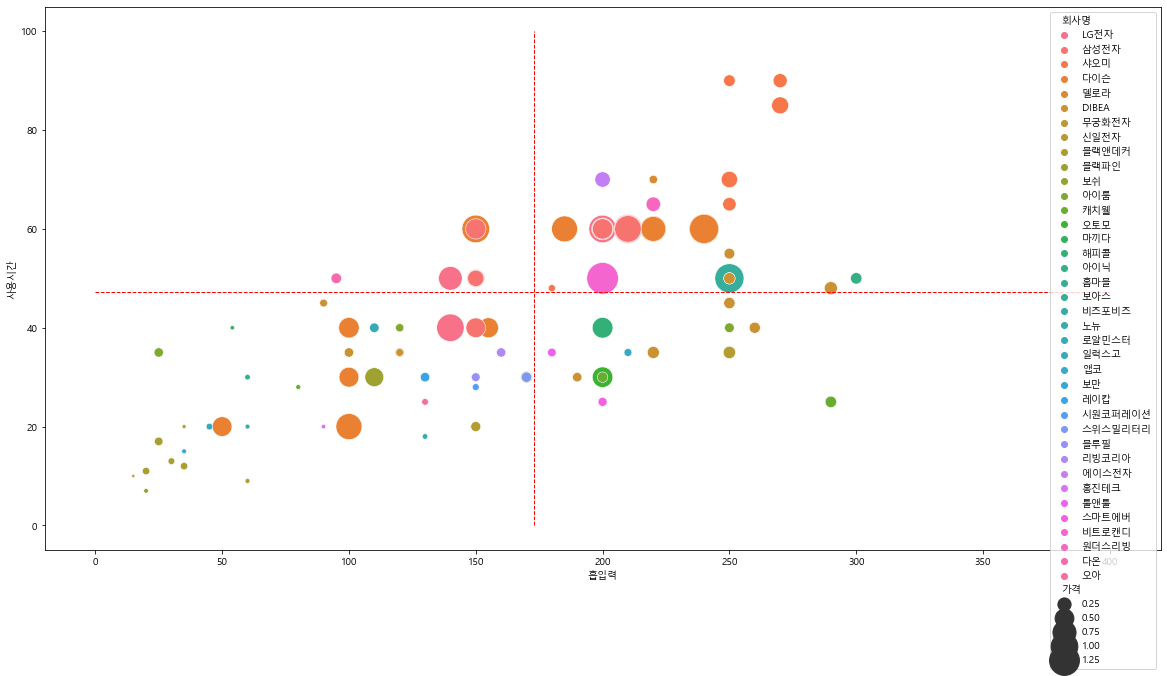

In [99]:
# 방법 1
plt.figure(figsize=(20,10))
sns.scatterplot(x='흡입력', y='사용시간', 
                size = '가격', 
                hue = chart_data['회사명'],  # 색상의 구분 기준
                data = chart_data, sizes=(10,1000))

plt.hlines(use_time_mean_value,  # y
           0,                    # xmin
           400,                  # xmax
           color='red',
           linestyle='dashed', 
           linewidth=1)


plt.vlines(suction_mean_value, 0, 100, color='red', linestyle='dashed', linewidth=1)

plt.show()

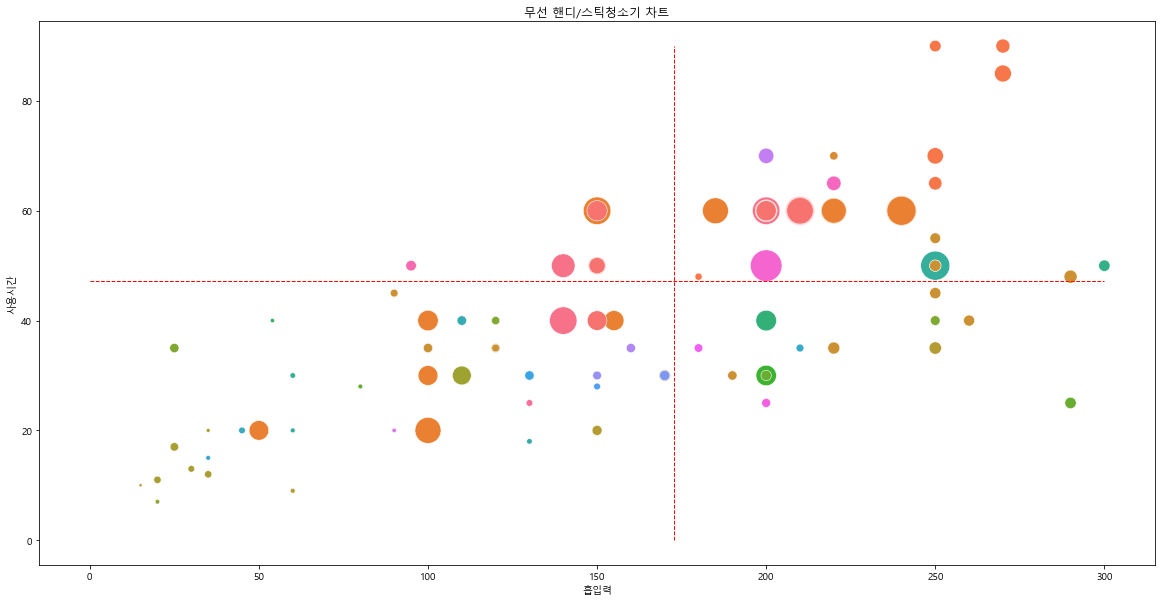

In [101]:
# 방법 2
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 차트')
sns.scatterplot(x='흡입력', y='사용시간', 
                size = '가격', 
                hue = chart_data['회사명'],  # 색상의 구분 기준
                data = chart_data, sizes=(10,1000), legend = False)
plt.plot([0,suction_max_value],
         [use_time_mean_value , use_time_mean_value],
         'r--',
         lw = 1)

plt.plot([suction_mean_value, suction_mean_value],
         [0, use_time_max_value],
         'r--',
         lw = 1)
plt.show()

In [103]:
# 인기순 상위 10개
chart_data_selected = chart_data[:10]
chart_data_selected

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057790,60.0,210.0
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,566140,60.0,210.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,793730,60.0,210.0
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,902990,60.0,210.0
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60.0,200.0
5,핸디/스틱청소기,샤오미,드리미 V10,154445,60.0,220.0
6,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957D2,712960,60.0,210.0
9,핸디/스틱청소기,다이슨,V10 플러피 오리진,527450,60.0,151.0
10,핸디/스틱청소기,LG전자,코드제로 A9 A9100N,537540,50.0,140.0
11,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9470,887230,60.0,210.0


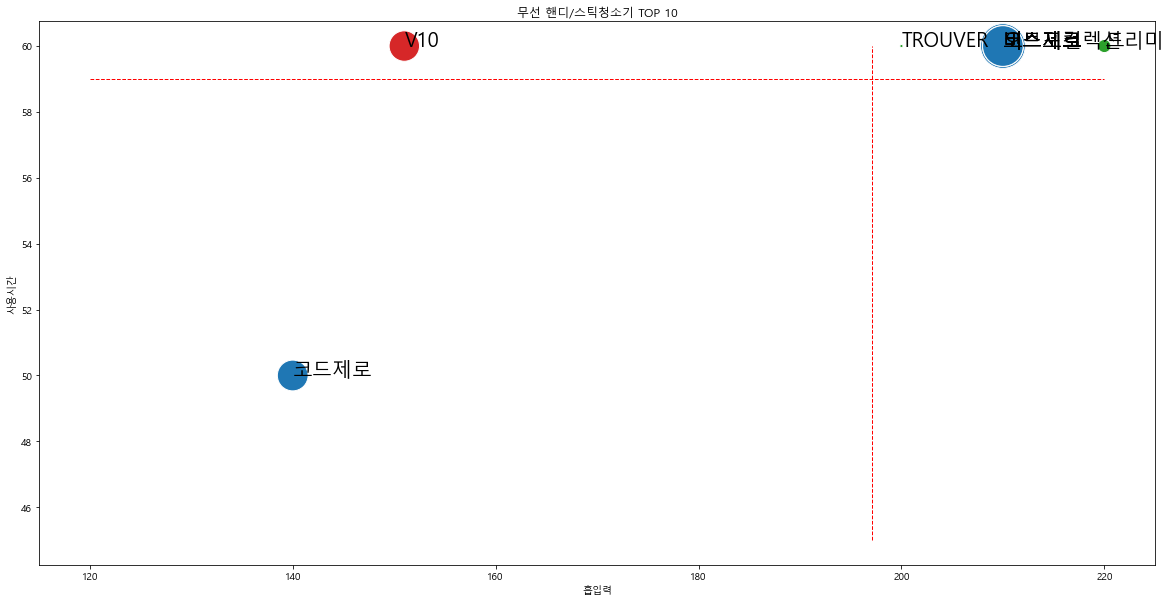

In [106]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 TOP 10')
sns.scatterplot(x='흡입력', y='사용시간', 
                size = '가격', hue = chart_data_selected['회사명'],
                data = chart_data_selected, sizes=(10,2000), legend = False)

plt.plot([120,suction_max_value],
         [use_time_mean_value , use_time_mean_value],
         'r--',
         lw = 1)

plt.plot([suction_mean_value, suction_mean_value],
         [45, use_time_max_value],
         'r--',
         lw = 1)


for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x,y,s,size=20)
    
plt.show()

In [112]:
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60.0,200.0
5,핸디/스틱청소기,샤오미,드리미 V10,154445,60.0,220.0
13,핸디/스틱청소기,델로라,V11 파워 300W,104990,70.0,220.0
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90.0,270.0
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90.0,250.0
36,핸디/스틱청소기,샤오미,드리미 V11SE,180430,60.0,240.0
40,핸디/스틱청소기,샤오미,TROUVER POWER 12,169520,60.0,220.0
57,핸디/스틱청소기,샤오미,드리미 V9,298000,60.0,200.0
105,핸디/스틱청소기,샤오미,G10,256950,65.0,250.0
142,핸디/스틱청소기,샤오미,로이드미 Z1 Air,199000,60.0,220.0


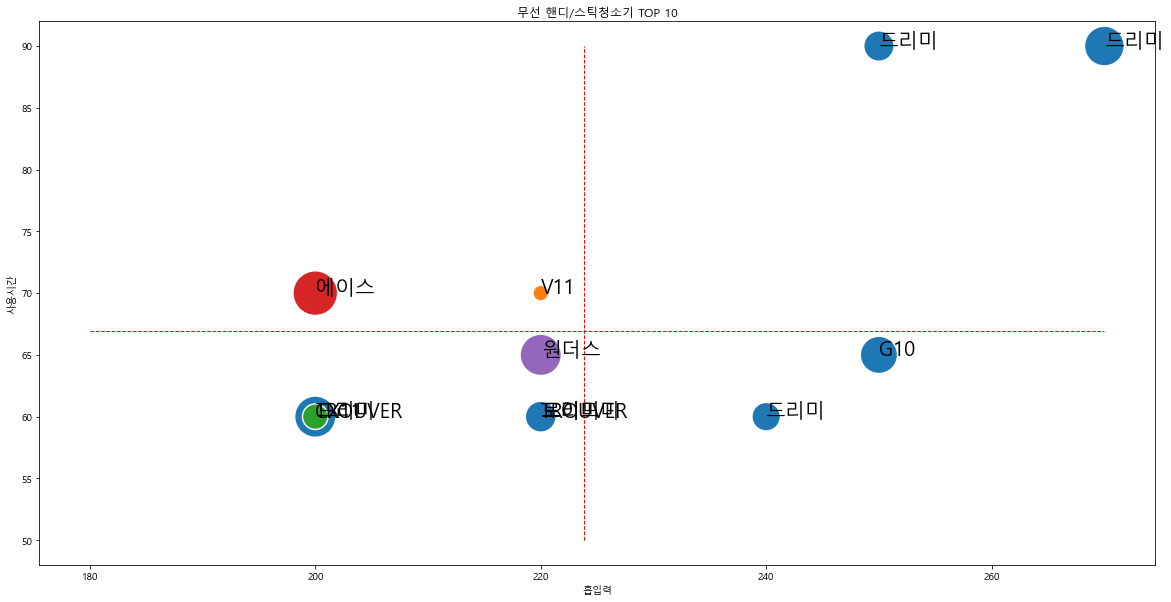

In [111]:
suction_max_value = condition_data['흡입력'].max()
suction_mean_value = condition_data['흡입력'].mean()
use_time_max_value = condition_data['사용시간'].max()
use_time_mean_value = condition_data['사용시간'].mean()

plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 TOP 10')
sns.scatterplot(x='흡입력', y='사용시간', 
                size = '가격', hue = condition_data['회사명'],
                data = condition_data, sizes=(10,2000), legend = False)

plt.plot([180,suction_max_value],
         [use_time_mean_value , use_time_mean_value],
         'r--',
         lw = 1)

plt.plot([suction_mean_value, suction_mean_value],
         [50, use_time_max_value],
         'r--',
         lw = 1)


for index, row in condition_data.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x,y,s,size=20)
    
plt.show()